In [2]:
# pip install Simeple-PairsTrading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import pmdarima as pm
from datetime import date
from dateutil.relativedelta import relativedelta
import yfinance as yf
import statsmodels.tsa.stattools as ts
import datetime
import itertools
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import sys

In [2]:
# import a list of symbols
syms = pd.read_csv('syms.csv')
syms['Sector'] = syms['Sector'].replace({np.nan:'None'})
syms_by_sectors = {}
for i in syms['Sector'].unique():
    syms_by_sectors[i] = syms.groupby('Sector').get_group(i)['Symbol'].to_list()

In [3]:
syms_by_sectors['Energy']

['AE',
 'AMPY',
 'AMR',
 'APA',
 'AR',
 'ARCH',
 'ARLP',
 'AT',
 'AXAS',
 'BATL',
 'BBL',
 'BC',
 'BCEI',
 'BE',
 'BKEP',
 'BKEPP',
 'BKR',
 'BLDP',
 'BORR',
 'BP',
 'BPMP',
 'BPT',
 'BRN',
 'BROG',
 'BROGW',
 'BRY',
 'BSM',
 'BTU',
 'BWXT',
 'CAPL',
 'CCLP',
 'CDEV',
 'CEI',
 'CEIX',
 'CEO',
 'CHK',
 'CHKEL',
 'CHKEW',
 'CHKEZ',
 'CKX',
 'CLB',
 'CLMT',
 'CLR',
 'CMI',
 'CNQ',
 'CNX',
 'COG',
 'COP',
 'CPE',
 'CPG',
 'CPST',
 'CRC',
 'CRK',
 'CRT',
 'CVE',
 'CVI',
 'CVX',
 'CYD',
 'DEN',
 'DK',
 'DKL',
 'DMLP',
 'DNOW',
 'DRQ',
 'DVN',
 'DWSN',
 'E',
 'EAF',
 'EC',
 'EGY',
 'EMR',
 'ENB',
 'ENBA',
 'ENSV',
 'EOG',
 'EPM',
 'EPSN',
 'EQNR',
 'EQT',
 'ERF',
 'ESTE',
 'FANG',
 'FET',
 'FI',
 'FLMN',
 'FLMNW',
 'FTI',
 'FTSI',
 'GBR',
 'GDP',
 'GE',
 'GEL',
 'GLP',
 'GPRK',
 'GTE',
 'HAL',
 'HCC',
 'HEP',
 'HES',
 'HESM',
 'HFC',
 'HLX',
 'HNRG',
 'HOLI',
 'HP',
 'HPK',
 'HPKEW',
 'HPR',
 'HUSA',
 'ICD',
 'IMO',
 'INDO',
 'INT',
 'IO',
 'IPWR',
 'KLXE',
 'KOS',
 'KRP',
 'LBRT',
 'LPI',
 '

In [551]:
from Simple_PairsTrading.Simple_PairsTrading import pairs_trading
pt = pairs_trading()

In [555]:
pt.add(filtered_syms, start='2020-02-01', end='2021-02-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [556]:
pt.find_candidates()

Finding cointegrated pairs: 
    2346/2346 YMTX, ZIOP
    524/2346 are cointegrated.
 
Finding stationary spreads: 
    524/524 IAF, OPTTAS
    258/524 match the criteria.
 
    37 Candidates have peaks more than 11.
    37 are profitable.


In [559]:
pt.candidates.sort_values('HurstEXP', ascending=False)

,candidate,p_adfuller,halflife,peaks,HurstEXP,p_coin,profitability
13,"(DVD, MOV)",0.003761,4.494094,12,0.152985,0.000843,3
18,"(EGY, M)",0.000068,5.140421,12,0.14279,0.000265,3
34,"(IHD, TTMI)",0.007127,3.484639,12,0.111909,0.015729,2
30,"(RGP, WRB)",0.000677,5.574491,12,0.11036,0.000135,2
36,"(BCC, MDLA)",0.000651,4.84285,12,0.097231,0.002347,1
16,"(SBI, TRC)",0.004619,3.729419,12,0.087881,0.005272,3
25,"(SRRA, TSEM)",0.003449,6.091968,12,0.086727,0.002209,2
35,"(JMM, TRC)",0.001379,5.155872,12,0.085882,0.013214,1
19,"(CLPS, HCM)",0.000048,3.460544,13,0.085378,0.000688,3
26,"(HSC, OTIC)",0.00252,6.861753,12,0.084748,0.005704,2


3  trading opportunities identified from 2020-01-31 to 2021-01-29 for DVD - MOV Spread


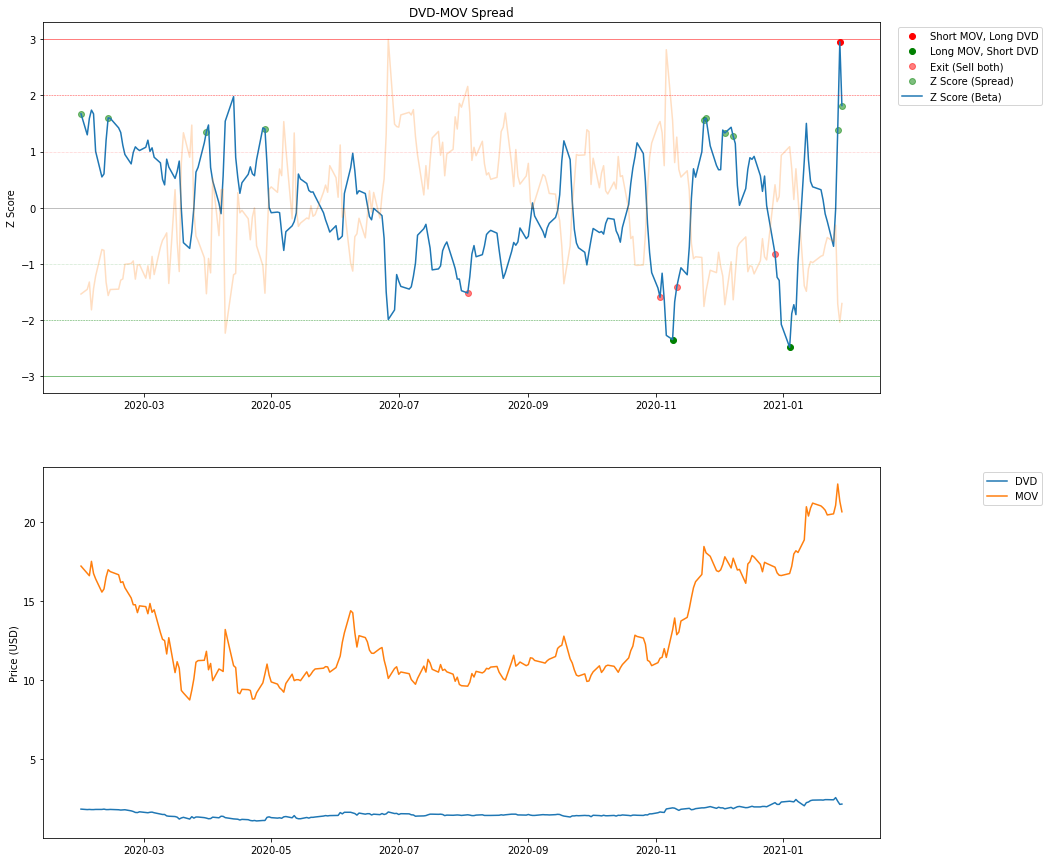

In [560]:
S1, S2, S1_ex, S2_ex = pt.plot(13)